# Project Wine (Part 3b)
## Data Analysis with ```scikit-learn```
<hr>
This notebook is the third part of the Project. We separate the project into several different notebooks (in line with the project guidelines):
1. Data Acquisition ([Red Wine Data Acquisition](Wine Data Acquisition.ipynb))
2. Data Exploration ([Preprocessing](Project_Preprocess.ipynb))
3. Data Analysis and Interpretation ([Linear Regression](Project_LinReg.ipynb), scikit-learn (This notebook))

This allows us to work together in a more efficient manner, click on the links of the notebook to navigate around the project.

Comments are available in the code snippets to aid in explaination.

In part 3b of this project, we will analyze the data with ```scikit-learn``` to find out if this is a model to predict wine quality.

In [7]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

from sklearn.preprocessing import PolynomialFeatures

We selected the train data and test data with ```np.random.permutation```

In [8]:
data = np.loadtxt('final_data.txt', delimiter=';')

# number of training data
n = data.shape[0] 
print(n)

#select the train data and test data
idx = np.random.permutation(range(n))
idx_test = idx[:271]
idx_train = idx[271:1471]
#print(idx_train)
#print(len(idx_train))
#print(len(idx_test))
train_data = data[idx_train,:]
test_data = data[idx_test, :]

#input the data, X
X = np.ones([1200, 2])
X [:, 0] = train_data[:, 0]
X [:, 1] = train_data[:, 1]
#print(X.shape)
print(X)

#input y
y = np.ones([1200, 1])
y [:, 0] = train_data[:, 2]
print (y)

1471
[[  0.42   12.3  ]
 [  0.43    9.4  ]
 [  0.415   9.2  ]
 ..., 
 [  0.43   11.5  ]
 [  0.34   11.4  ]
 [  0.705  10.2  ]]
[[ 6.]
 [ 5.]
 [ 5.]
 ..., 
 [ 7.]
 [ 6.]
 [ 5.]]


### Define the predictive and loss function

In [9]:
#define the predictive function
def pred_f (X, w):
    y_pred = X.dot(w)
    return y_pred
#print(pred_f(X,w))

In [10]:
#define the loss function
def loss_mse(w,X,y): 
    n = len(y)
    y_pred = pred_f (X, w) 
    z = y_pred - y
    loss = 1/n*(z.T).dot(z)
    return loss
#print(mse_f(X, w, y))

### We chose the number 4 as the polynomial dimension in this ```scikit-learn``` model

In [13]:
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
#print(X_poly.shape)

# run logistic regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_poly, y) 
print('Time=',time.time() - start)

# compute sklearn parameters
w_sklearn = np.zeros([16,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1:16,0] = lin_reg_sklearn.coef_
print(w_sklearn.shape)

#calculate the loss based on train_data
X1 = np.ones([1200,16])
X1 [:, 1:16] = X_poly[:, 0:15]
loss_sklearn = loss_mse(w_sklearn,X1,y)
print('loss sklearn=',loss_sklearn)

Time= 0.012008905410766602
(16, 1)
loss sklearn= [[ 0.414673]]


### Plotting of data on 3D graph

Text(0.5,0,'quality')

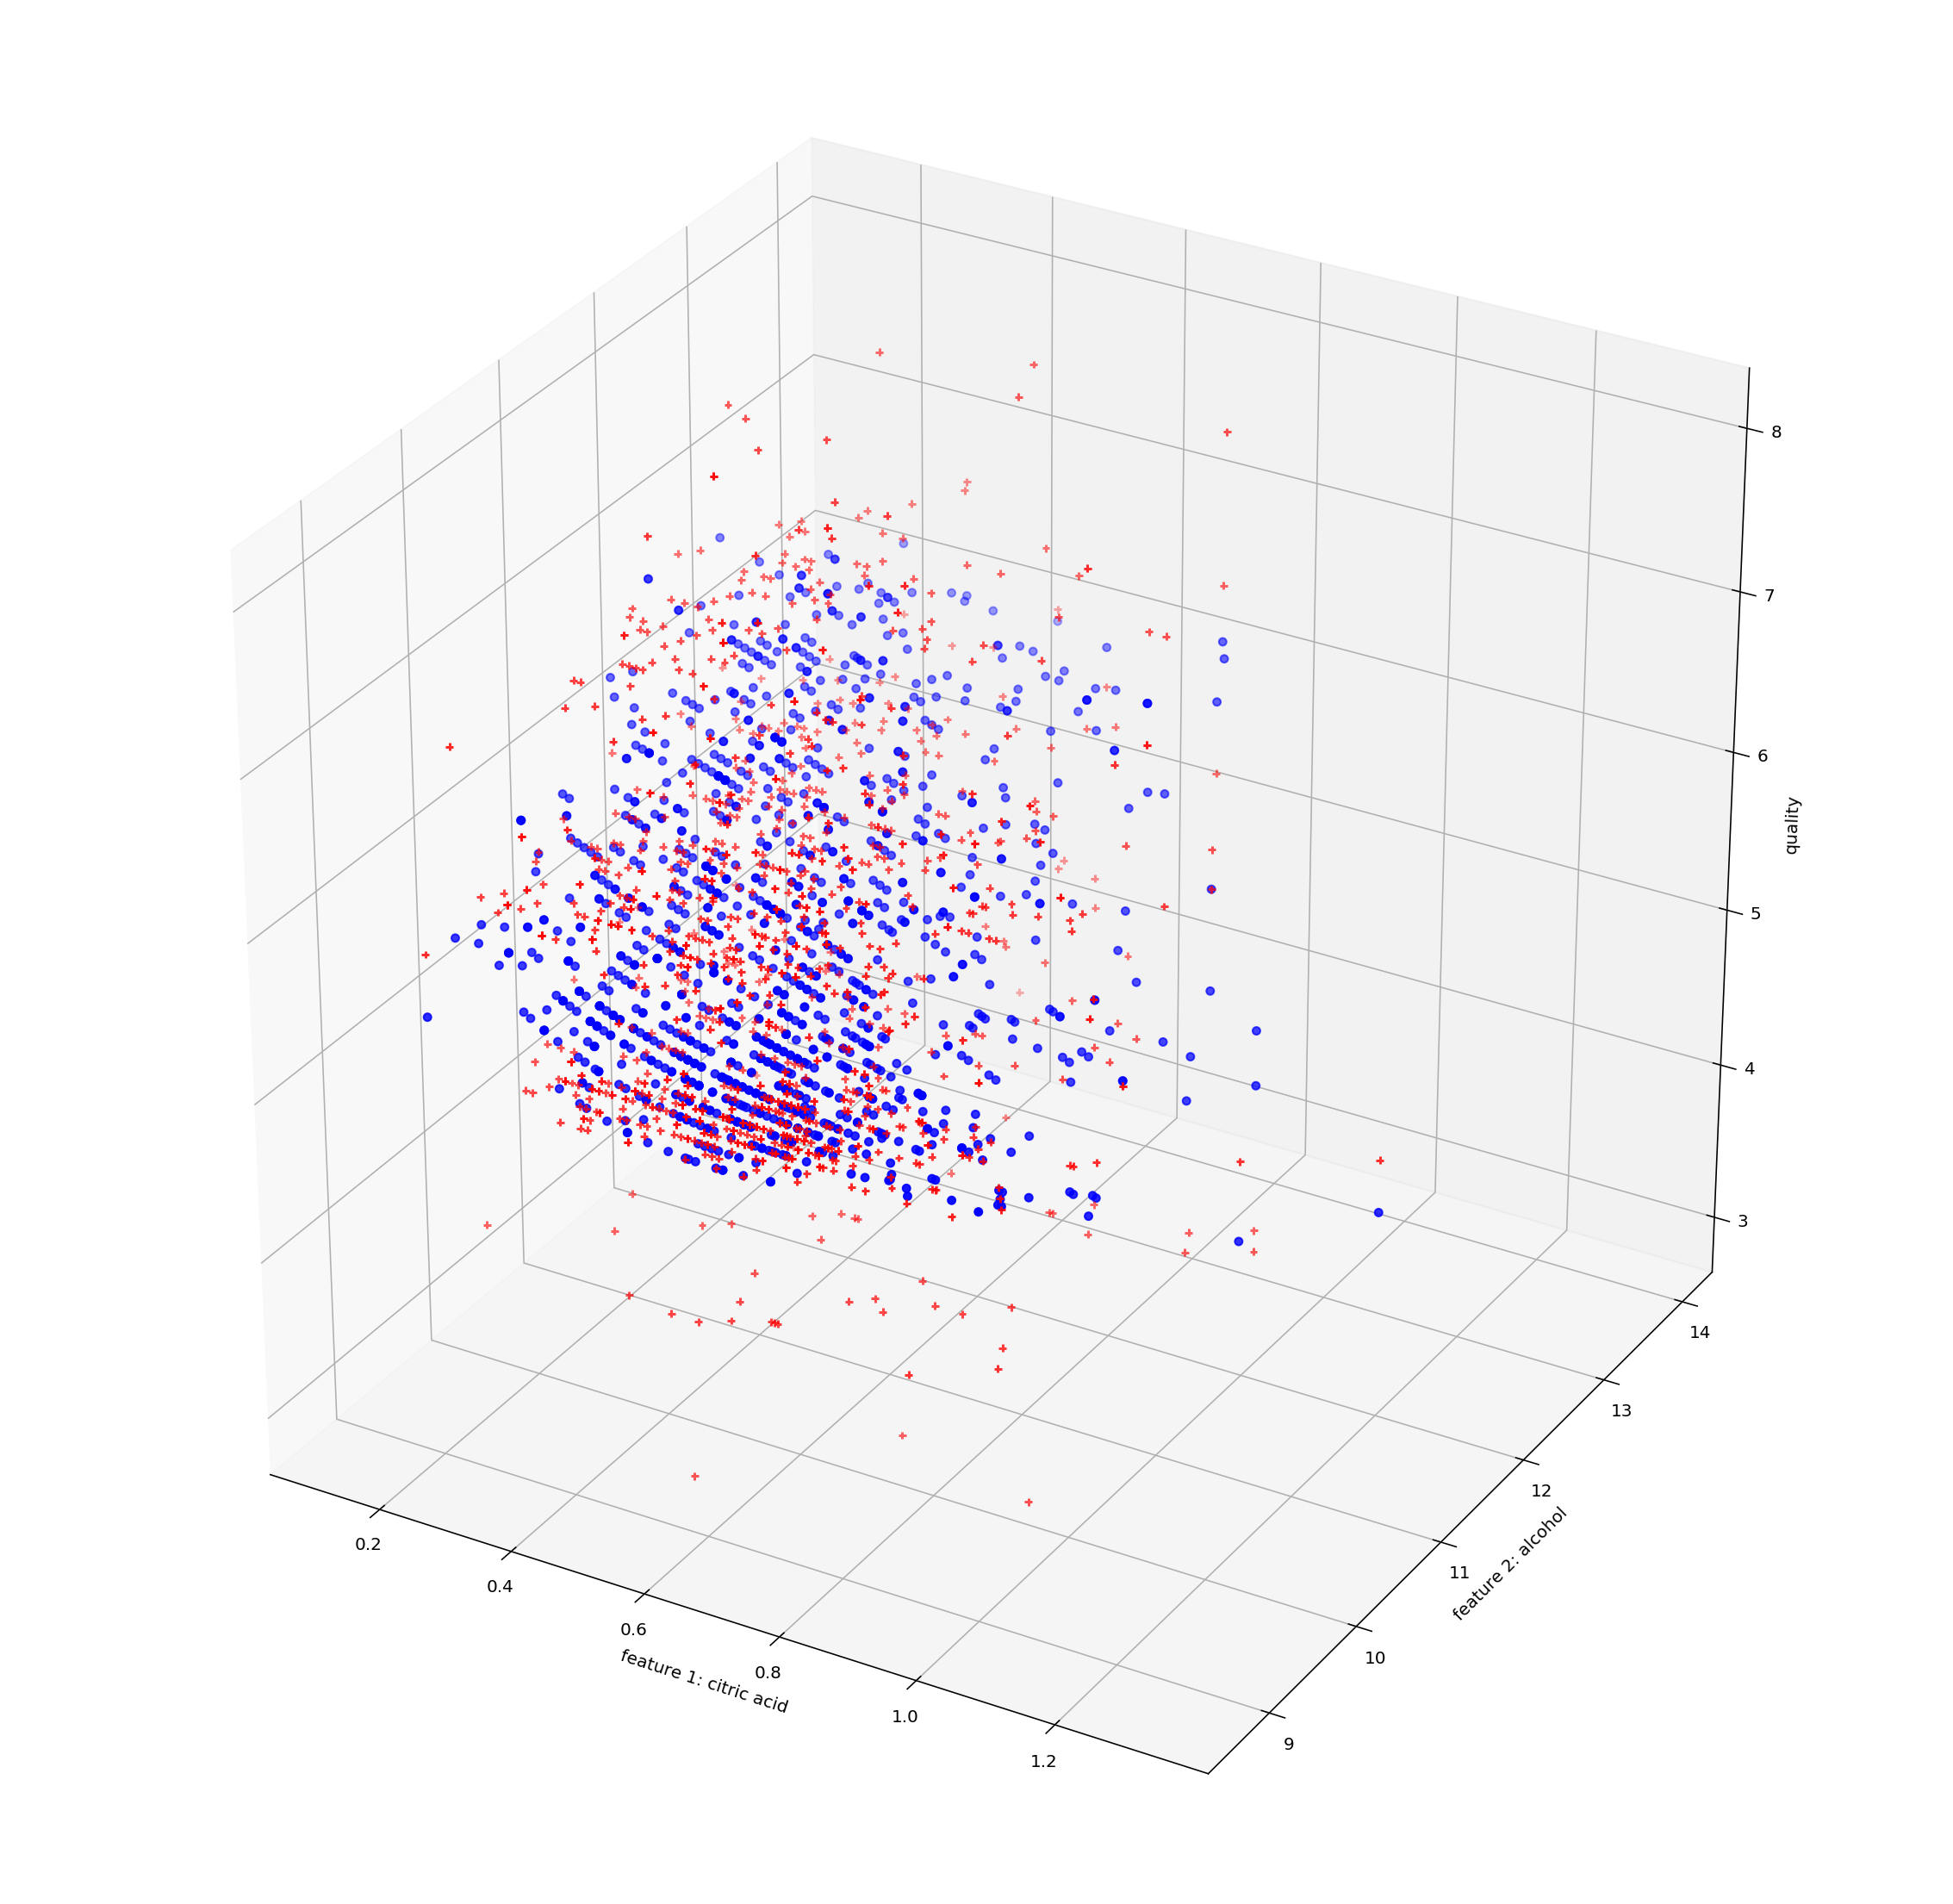

In [23]:
#visualize all data by 3D graph
X_origin = np.ones([1471, 2])
X_origin[:, 0:1] = data[:,0:1]
X_origin_poly = poly.fit_transform(X_origin)
X_origin_Skl = np.ones([1471, 16])
X_origin_Skl[:, 1:15] = X_origin_poly[:, 0:14]
#print(X_origin_Skl.shape)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1,projection='3d')
x_vals = train_data[:,0]
y_vals = train_data[:,1]
z_vals1 = pred_f(X1, w_sklearn)
z_vals2 = train_data[:,2]
#visualisation of both predicted value and actual vallue, where predicted value is in blue while actual value is in red
ax.scatter(x_vals, y_vals, z_vals1, c = 'b', marker='o')
ax.scatter(x_vals, y_vals, z_vals2, c = 'r', marker='+')
ax.set_xlabel('feature 1: citric acid') 
ax.set_ylabel('feature 2: alcohol')
ax.set_zlabel('quality')


In [20]:
#test the error by test_data
test_X = np.ones([271, 2])
test_X[:, 0] = test_data[:, 0]
test_X[:, 1] = test_data[:, 1]
test_y = np.ones([271, 1])
test_y[:, 0] = test_data[:, 2]
poly = PolynomialFeatures(4)
test_X_poly = poly.fit_transform(test_X)
X2 = np.ones([271, 16])
X2[:, 1:16] = test_X_poly[:, 0:15]
loss_test = loss_mse(w_sklearn,X2,test_y)
print('loss based on test data =',loss_test)

loss based on test data = [[ 0.38778228]]


Text(0.5,0,'quality')

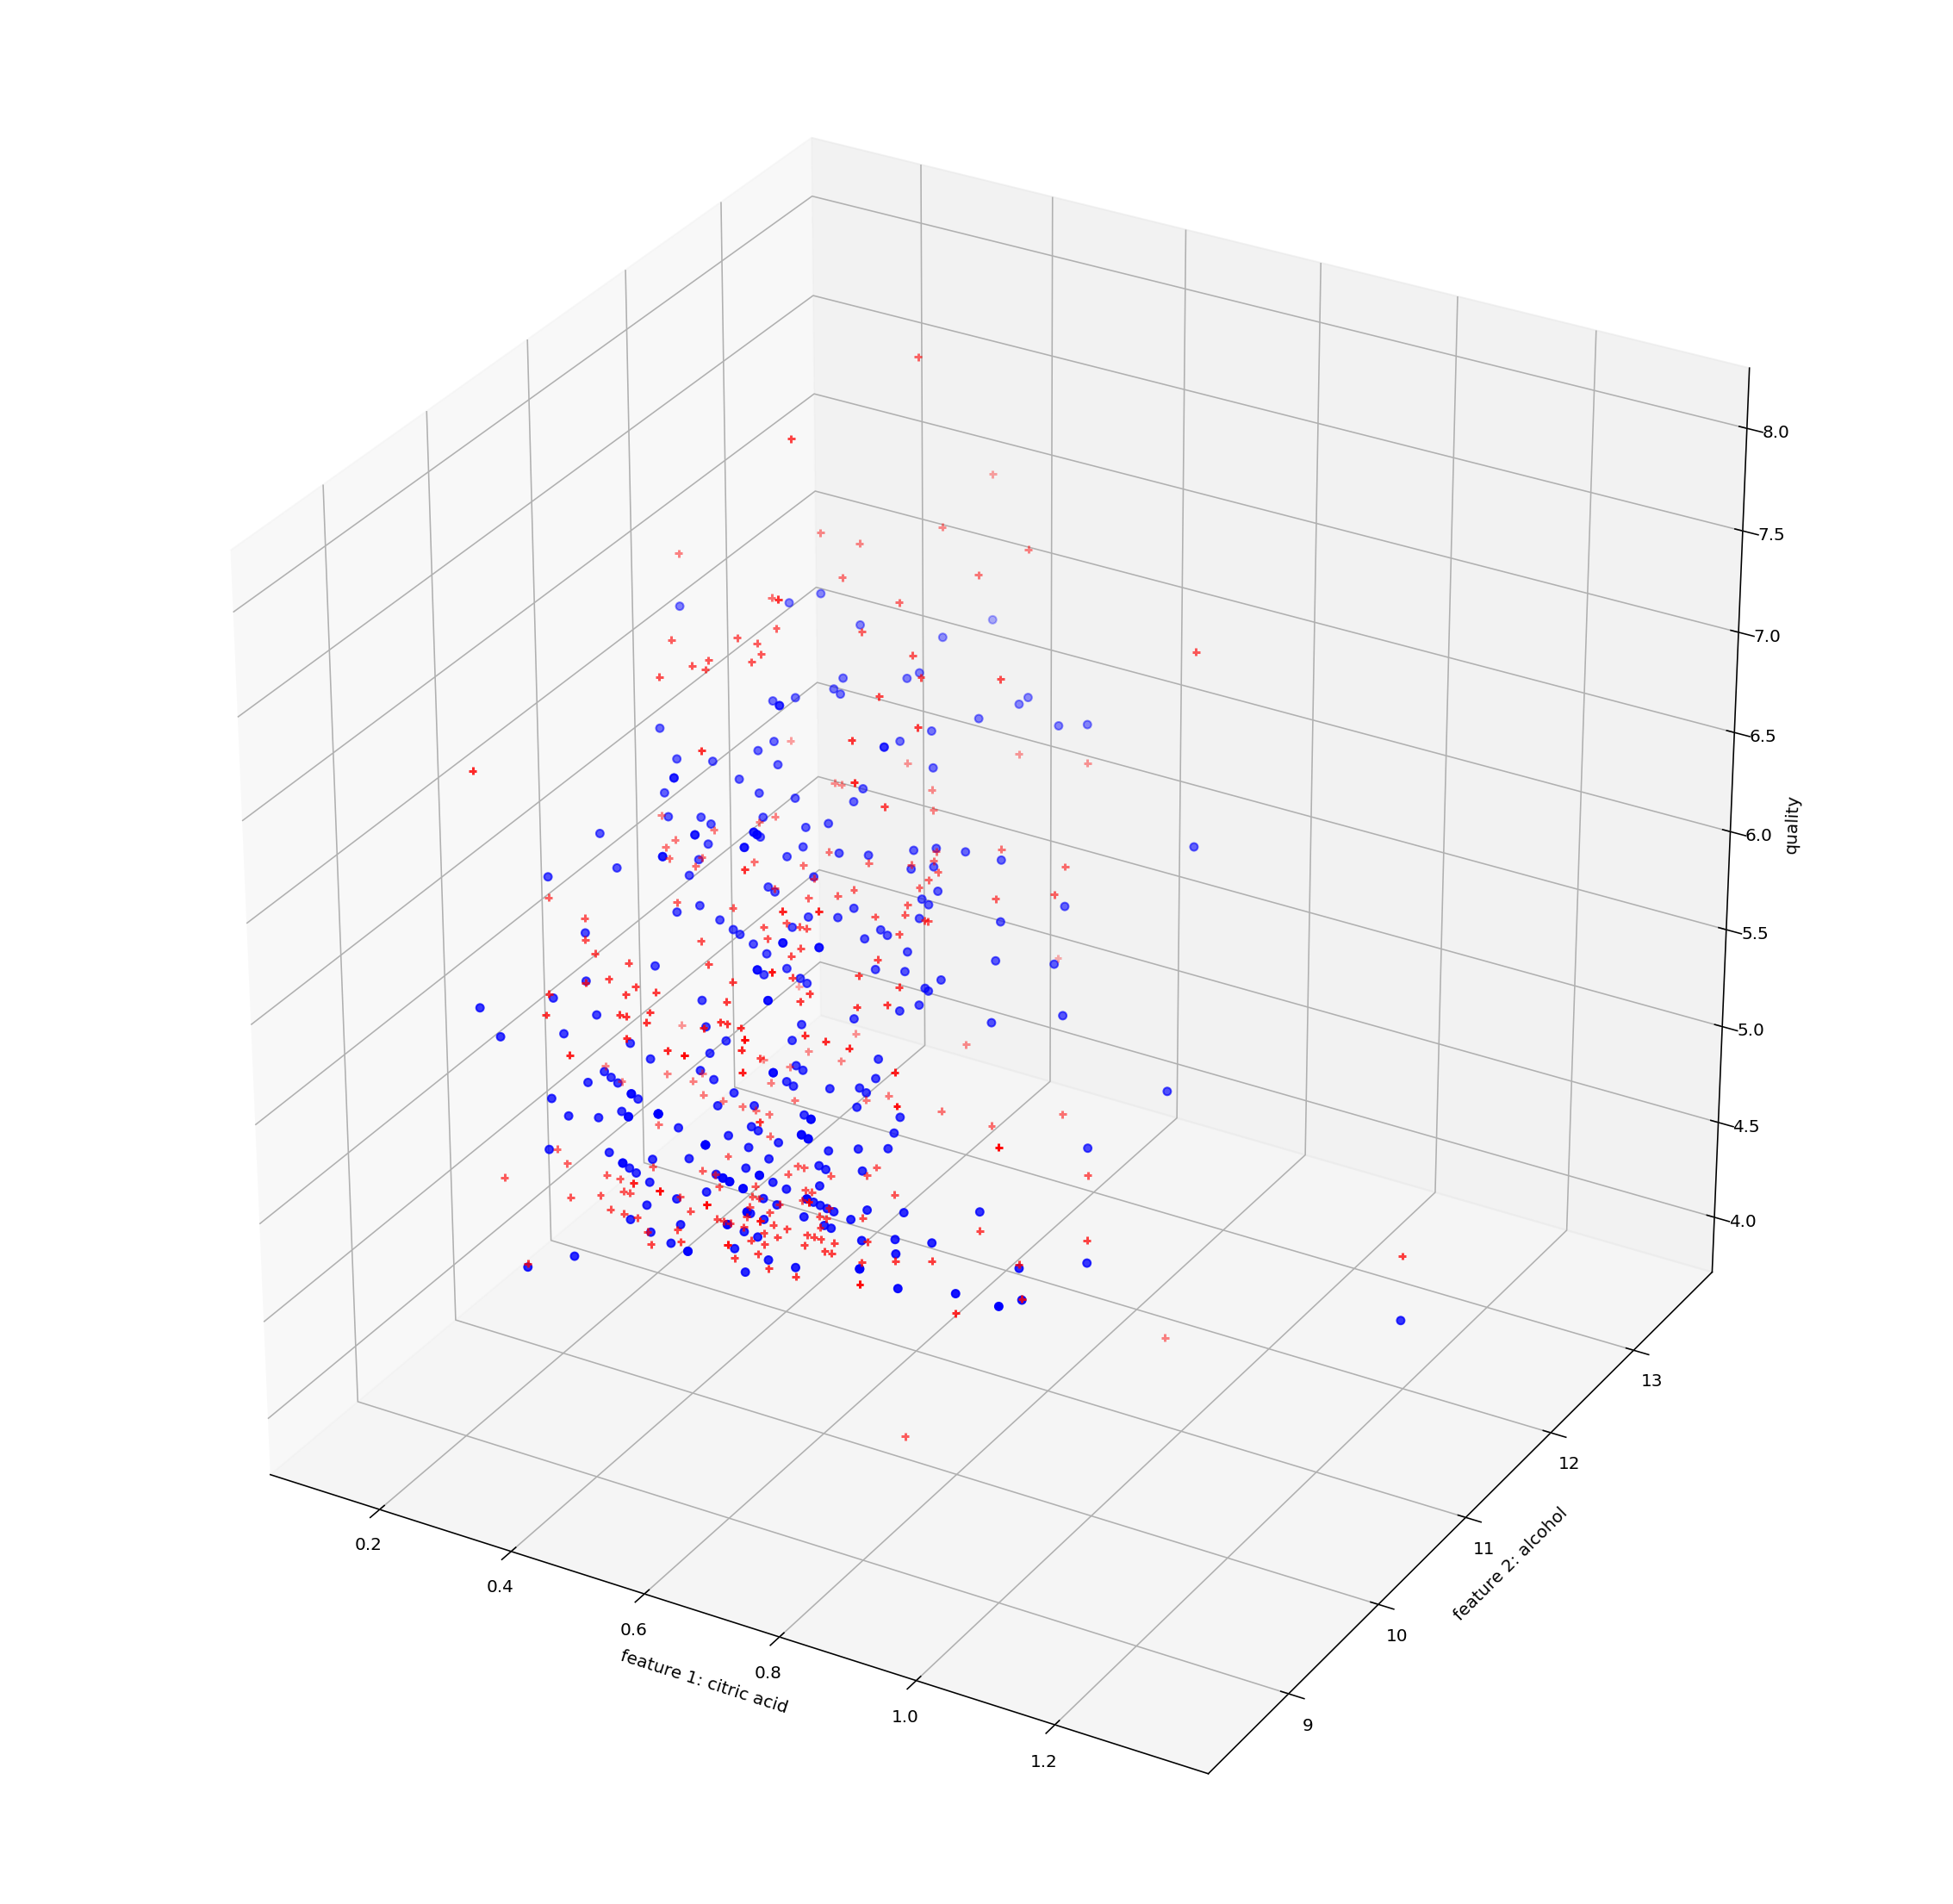

In [21]:
#visualize test data
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1,projection='3d')
x_vals = test_data[:, 0]
y_vals = test_data[:, 1]
z_vals1 = pred_f(X2, w_sklearn)
z_vals2 = test_data[:,2]
#visualisation of both predicted value and actual vallue, where predicted value is in blue while actual value is in red
ax.scatter(x_vals, y_vals, z_vals1, c = 'b', marker='o')
ax.scatter(x_vals, y_vals, z_vals2, c = 'r', marker='+')
ax.set_xlabel('feature 1: citric acid') 
ax.set_ylabel('feature 2: alcohol')
ax.set_zlabel('quality')